In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from subprocess import check_output

### Importing Libraries

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import nltk.classify.util
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.classify import NaiveBayesClassifier
import numpy as np
import re
import string
import nltk
%matplotlib inline

In [4]:
temp = pd.read_csv(r"1429_1.csv")
temp.head()

/Library/Python/2.7/site-packages/IPython/core/interactiveshell.py:2714: DtypeWarning: Columns (1,10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,...,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username
0,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,This product so far has not disappointed. My c...,Kindle,NaN,NaN,Adapter
1,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,great for beginner or experienced person. Boug...,very fast,NaN,NaN,truman
2,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,NaN,NaN,DaveZ
3,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,4.0,http://reviews.bestbuy.com/3545/5620406/review...,I've had my Fire HD 8 two weeks now and I love...,Good!!!,NaN,NaN,Shacks
4,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-12T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,NaN,NaN,explore42


In [5]:
permanent = temp[['reviews.rating' , 'reviews.text' , 'reviews.title' , 'reviews.username']]
print(permanent.isnull().sum()) #Checking for null values
permanent.head()

reviews.rating      33
reviews.text         1
reviews.title        5
reviews.username     2
dtype: int64


,reviews.rating,reviews.text,reviews.title,reviews.username
0,5.0,This product so far has not disappointed. My c...,Kindle,Adapter
1,5.0,great for beginner or experienced person. Boug...,very fast,truman
2,5.0,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,DaveZ
3,4.0,I've had my Fire HD 8 two weeks now and I love...,Good!!!,Shacks
4,5.0,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,explore42


### Filtering null values

In [6]:
check =  permanent[permanent["reviews.rating"].isnull()]
check.head()

,reviews.rating,reviews.text,reviews.title,reviews.username
2886,NaN,The Kindle is my first e-ink reader. I own an ...,"Worth the money. Not perfect, but very very go...",Jeffrey Stanley
2887,NaN,"I'm a first-time Kindle owner, so I have nothi...","I Wanted a Dedicated E-Reader, and That's What...",Matthew Coenen
2888,NaN,UPDATE NOVEMBER 2011:My review is now over a y...,Kindle vs. Nook (updated),Ron Cronovich
2889,NaN,"I'm a first-time Kindle owner, so I have nothi...","I Wanted a Dedicated E-Reader, and That's What...",Matthew Coenen
2890,NaN,I woke up to a nice surprise this morning: a n...,"Not the perfect do-it-all device, but very clo...",C. Tipton


### Filtering not null values

In [7]:
senti= permanent[permanent["reviews.rating"].notnull()]
permanent.head()

,reviews.rating,reviews.text,reviews.title,reviews.username
0,5.0,This product so far has not disappointed. My c...,Kindle,Adapter
1,5.0,great for beginner or experienced person. Boug...,very fast,truman
2,5.0,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,DaveZ
3,4.0,I've had my Fire HD 8 two weeks now and I love...,Good!!!,Shacks
4,5.0,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,explore42


### Using ratings to Classify text as postive and negative

In [9]:
senti["senti"] = senti["reviews.rating"]>=4
senti["senti"] = senti["senti"].replace([True , False] , ["pos" , "neg"])

/Library/Python/2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Library/Python/2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


### Count of reviews

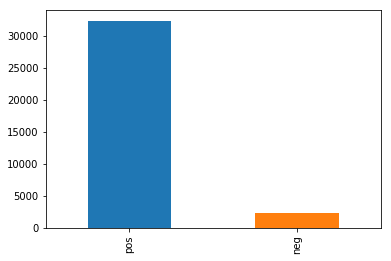

In [10]:
senti["senti"].value_counts().plot.bar()

As we can see data is unbalanced so this will create problem for model but, will take this data as it is and will predict our reviews.

### Cleaning Text

In [12]:
import nltk.classify.util
from nltk.classify import NaiveBayesClassifier
import numpy as np
import re
import string
import nltk

cleanup_re = re.compile('[^a-z]+')
def cleanup(sentence):
    sentence = str(sentence)
    sentence = sentence.lower()
    sentence = cleanup_re.sub(' ', sentence).strip()
    #sentence = " ".join(nltk.word_tokenize(sentence))
    return sentence

senti["Summary_Clean"] = senti["reviews.text"].apply(cleanup)
check["Summary_Clean"] = check["reviews.text"].apply(cleanup)

/Library/Python/2.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/Library/Python/2.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


### Splitting Train and Test Data

In [13]:
split = senti[["Summary_Clean" , "senti"]]
train=split.sample(frac=0.8,random_state=200)
test=split.drop(train.index)

In [32]:
print(train.shape, test.shape)

((27702, 3), (6925, 3))


### Feature Extracter for NLTK Naive bayes classifier

In [14]:
def word_feats(words):
    features = {}
    for word in words:
        features [word] = True
    return features

In [17]:
train["words"] = train["Summary_Clean"].str.lower().str.split()
test["words"] = test["Summary_Clean"].str.lower().str.split()
check["words"] = check["Summary_Clean"].str.lower().str.split()


train.index = range(train.shape[0])
test.index = range(test.shape[0])
check.index = range(check.shape[0])
prediction =  {} ## For storing results of different classifiers

train_naive = []
test_naive = []
check_naive = []

for i in range(train.shape[0]):
    train_naive = train_naive +[[word_feats(train["words"][i]) , train["senti"][i]]]
for i in range(test.shape[0]):
    test_naive = test_naive +[[word_feats(test["words"][i]) , test["senti"][i]]]
for i in range(check.shape[0]):
    check_naive = check_naive +[word_feats(check["words"][i])]

    
classifier = NaiveBayesClassifier.train(train_naive)
print("NLTK Naive bayes Accuracy : {}".format(nltk.classify.util.accuracy(classifier , test_naive)))
classifier.show_most_informative_features(5)

/Library/Python/2.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


NLTK Naive bayes Accuracy : 0.589747292419
Most Informative Features
                 deleted = True              neg : pos    =     51.3 : 1.0
                 warning = True              neg : pos    =     51.3 : 1.0
                    bent = True              neg : pos    =     42.0 : 1.0
                    nope = True              neg : pos    =     42.0 : 1.0
                  rotate = True              neg : pos    =     42.0 : 1.0


### predicting result of nltk classifier

In [18]:
y =[]
only_words= [test_naive[i][0] for i in range(test.shape[0])]
for i in range(test.shape[0]):
    y = y + [classifier.classify(only_words[i] )]
prediction["Naive"]= np.asarray(y)

y1 = []
for i in range(check.shape[0]):
    y1 = y1 + [classifier.classify(check_naive[i] )]

check["Naive"] = y1

/Library/Python/2.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


### Now we are bulding Countvector and Tfidf vector for train , test ,check data

In [19]:
from wordcloud import STOPWORDS

from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
stopwords = set(STOPWORDS)
stopwords.remove("not")

count_vect = CountVectorizer(min_df=2 ,stop_words=stopwords , ngram_range=(1,2))
tfidf_transformer = TfidfTransformer()

X_train_counts = count_vect.fit_transform(train["Summary_Clean"])        
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)


X_new_counts = count_vect.transform(test["Summary_Clean"])
X_test_tfidf = tfidf_transformer.transform(X_new_counts)

checkcounts = count_vect.transform(check["Summary_Clean"])
checktfidf = tfidf_transformer.transform(checkcounts)

/Library/Python/2.7/site-packages/sklearn/feature_extraction/text.py:1089: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


### Fitiing Multinomial NB

In [20]:
from sklearn.naive_bayes import MultinomialNB
model1 = MultinomialNB().fit(X_train_tfidf , train["senti"])
prediction['Multinomial'] = model1.predict_proba(X_test_tfidf)[:,1]
print("Multinomial Accuracy : {}".format(model1.score(X_test_tfidf , test["senti"])))

check["multi"] = model1.predict(checktfidf)## Predicting Sentiment for Check which was Null values for rating

Multinomial Accuracy : 0.932996389892


/Library/Python/2.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


### Fitiing Bernouli NB

In [21]:
from sklearn.naive_bayes import BernoulliNB
model2 = BernoulliNB().fit(X_train_tfidf,train["senti"])
prediction['Bernoulli'] = model2.predict_proba(X_test_tfidf)[:,1]
print("Bernoulli Accuracy : {}".format(model2.score(X_test_tfidf , test["senti"])))

check["Bill"] = model2.predict(checktfidf)## Predicting Sentiment for Check which was Null values for rating

Bernoulli Accuracy : 0.920433212996


/Library/Python/2.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


### Fitiing LogisticRegression

In [22]:
from sklearn import linear_model
logreg = linear_model.LogisticRegression(solver='lbfgs' , C=1000)
logistic = logreg.fit(X_train_tfidf, train["senti"])
prediction['LogisticRegression'] = logreg.predict_proba(X_test_tfidf)[:,1]
print("Logistic Regression Accuracy : {}".format(logreg.score(X_test_tfidf , test["senti"])))

check["log"] = logreg.predict(checktfidf)## Predicting Sentiment for Check which was Null values for rating

Logistic Regression Accuracy : 0.937039711191


/Library/Python/2.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


### Getting most occuring words in train set

In [23]:
words = count_vect.get_feature_names()
feature_coefs = pd.DataFrame(
    data = list(zip(words, logistic.coef_[0])),
    columns = ['feature', 'coef'])
feature_coefs.sort_values(by="coef")

,feature,coef
42481,terrible,-20.185973
10646,done great,-19.422237
48058,will definitely,-19.260462
18449,great year,-17.727556
38808,slow,-17.623253
36300,returning,-17.388673
45890,using firestick,-16.283672
16576,gift three,-16.282578
32516,price isn,-16.251511
36261,return,-15.971584


### Lets find out which classifier is doing what

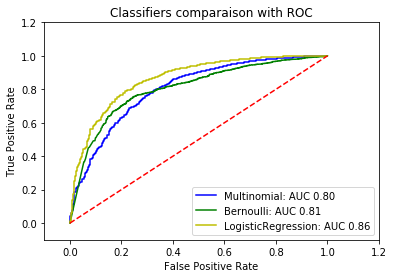

In [24]:
def formatt(x):
    if x == 'neg':
        return 0
    if x == 0:
        return 0
    return 1
vfunc = np.vectorize(formatt)

cmp = 0
colors = ['b', 'g', 'y', 'm', 'k']
for model, predicted in prediction.items():
    if model not in 'Naive':
        false_positive_rate, true_positive_rate, thresholds = roc_curve(test["senti"].map(vfunc), predicted)
        roc_auc = auc(false_positive_rate, true_positive_rate)
        plt.plot(false_positive_rate, true_positive_rate, colors[cmp], label='%s: AUC %0.2f'% (model,roc_auc))
        cmp += 1

plt.title('Classifiers comparaison with ROC')
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Lets see precision and recall of different classifiers

In [25]:
test.senti = test.senti.replace(["pos" , "neg"] , [True , False] )

In [26]:
keys = prediction.keys()
for key in ['Multinomial', 'Bernoulli', 'LogisticRegression']:
    print(" {}:".format(key))
    print(metrics.classification_report(test["senti"], prediction.get(key)>.5, target_names = ["positive", "negative"]))
    print("\n")

 Multinomial:
             precision    recall  f1-score   support

   positive       0.00      0.00      0.00       464
   negative       0.93      1.00      0.97      6461

avg / total       0.87      0.93      0.90      6925



 Bernoulli:
             precision    recall  f1-score   support

   positive       0.33      0.17      0.23       464
   negative       0.94      0.97      0.96      6461

avg / total       0.90      0.92      0.91      6925



 LogisticRegression:
             precision    recall  f1-score   support

   positive       0.55      0.33      0.41       464
   negative       0.95      0.98      0.97      6461

avg / total       0.93      0.94      0.93      6925





/Library/Python/2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### Let test our classifiers with some handwritten samples

In [27]:
def test_sample(model, sample):
    sample_counts = count_vect.transform([sample])
    sample_tfidf = tfidf_transformer.transform(sample_counts)
    result = model.predict(sample_tfidf)[0]
    prob = model.predict_proba(sample_tfidf)[0]
    print("Sample estimated as %s: negative prob %f, positive prob %f" % (result.upper(), prob[0], prob[1]))

test_sample(logreg, "The product was good and easy to  use")
test_sample(logreg, "the whole experience was horrible and product is worst")
test_sample(logreg, "product is not good")

Sample estimated as POS: negative prob 0.000000, positive prob 1.000000
Sample estimated as NEG: negative prob 0.993741, positive prob 0.006259
Sample estimated as NEG: negative prob 0.981141, positive prob 0.018859


### Here is predicted valuesof classifiers for check on the basis of review text

In [28]:
check.head(10)

,reviews.rating,reviews.text,reviews.title,reviews.username,Summary_Clean,words,Naive,multi,Bill,log
0,NaN,The Kindle is my first e-ink reader. I own an ...,"Worth the money. Not perfect, but very very go...",Jeffrey Stanley,the kindle is my first e ink reader i own an i...,"[the, kindle, is, my, first, e, ink, reader, i...",neg,pos,neg,pos
1,NaN,"I'm a first-time Kindle owner, so I have nothi...","I Wanted a Dedicated E-Reader, and That's What...",Matthew Coenen,i m a first time kindle owner so i have nothin...,"[i, m, a, first, time, kindle, owner, so, i, h...",neg,pos,neg,pos
2,NaN,UPDATE NOVEMBER 2011:My review is now over a y...,Kindle vs. Nook (updated),Ron Cronovich,update november my review is now over a year o...,"[update, november, my, review, is, now, over, ...",neg,pos,neg,pos
3,NaN,"I'm a first-time Kindle owner, so I have nothi...","I Wanted a Dedicated E-Reader, and That's What...",Matthew Coenen,i m a first time kindle owner so i have nothin...,"[i, m, a, first, time, kindle, owner, so, i, h...",neg,pos,neg,pos
4,NaN,I woke up to a nice surprise this morning: a n...,"Not the perfect do-it-all device, but very clo...",C. Tipton,i woke up to a nice surprise this morning a ne...,"[i, woke, up, to, a, nice, surprise, this, mor...",neg,pos,neg,pos
5,NaN,The Kindle is my first e-ink reader. I own an ...,"Worth the money. Not perfect, but very very go...",Jeffrey Stanley,the kindle is my first e ink reader i own an i...,"[the, kindle, is, my, first, e, ink, reader, i...",neg,pos,neg,pos
6,NaN,UPDATE NOVEMBER 2011:br /br /My review is now ...,Kindle vs. Nook (updated),Ron Cronovich,update november br br my review is now over a ...,"[update, november, br, br, my, review, is, now...",neg,pos,neg,pos
7,NaN,I woke up to a nice surprise this morning: a n...,"Not the perfect do-it-all device, but very clo...",C. Tipton,i woke up to a nice surprise this morning a ne...,"[i, woke, up, to, a, nice, surprise, this, mor...",neg,pos,neg,pos
8,NaN,I use to hate to read but now that I have my K...,Great,D. Tatro,i use to hate to read but now that i have my k...,"[i, use, to, hate, to, read, but, now, that, i...",pos,pos,pos,pos
9,NaN,All of them quit working. There's absolutely n...,I've had 3!,M. Lansford Kindle fave,all of them quit working there s absolutely no...,"[all, of, them, quit, working, there, s, absol...",neg,pos,pos,pos


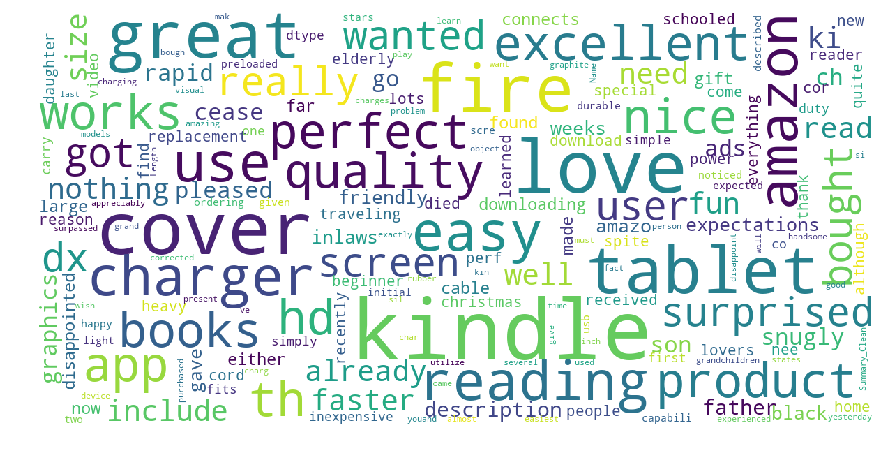

In [29]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)


mpl.rcParams['font.size']=12                #10 
mpl.rcParams['savefig.dpi']=100             #72 
mpl.rcParams['figure.subplot.bottom']=.1 


def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=300,
        max_font_size=40, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
        
    ).generate(str(data))
    
    fig = plt.figure(1, figsize=(15, 15))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()
    
show_wordcloud(senti["Summary_Clean"])

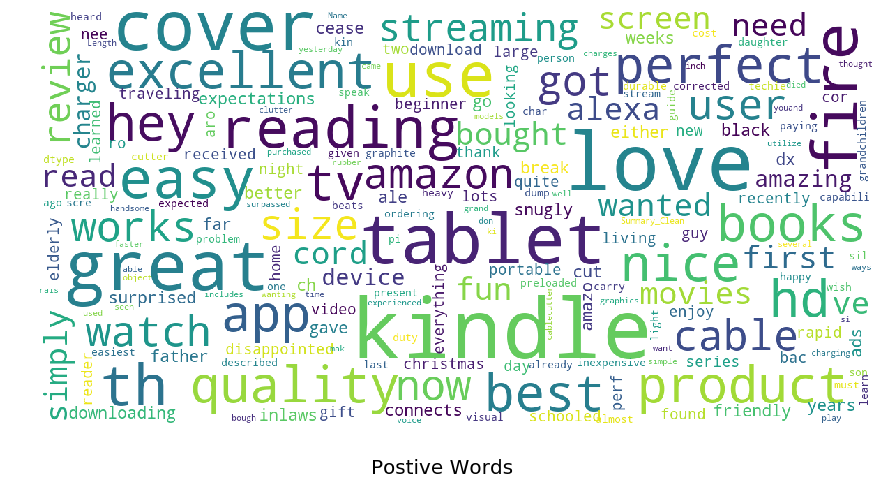

In [30]:
show_wordcloud(senti["Summary_Clean"][senti.senti == "pos"] , title="Postive Words")

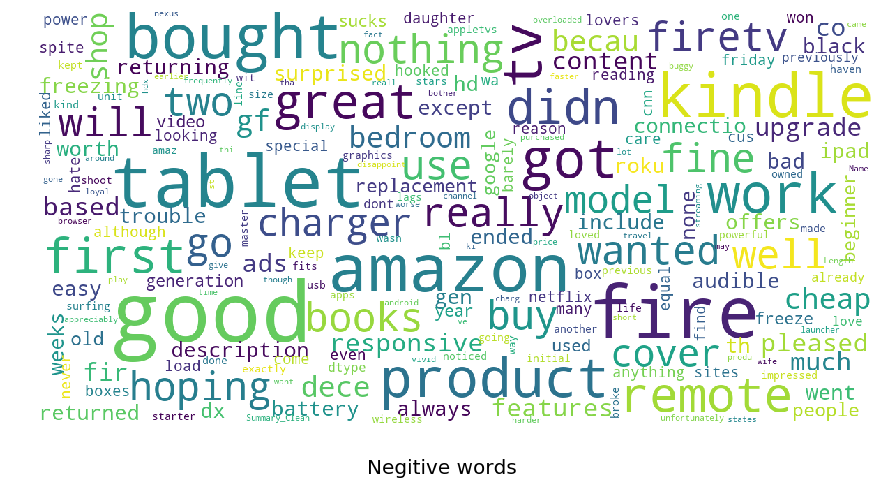

In [31]:
show_wordcloud(senti["Summary_Clean"][senti.senti == "neg"] , title="Negitive words")